In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import os
# import seaborn as sns

from matplotlib import rc


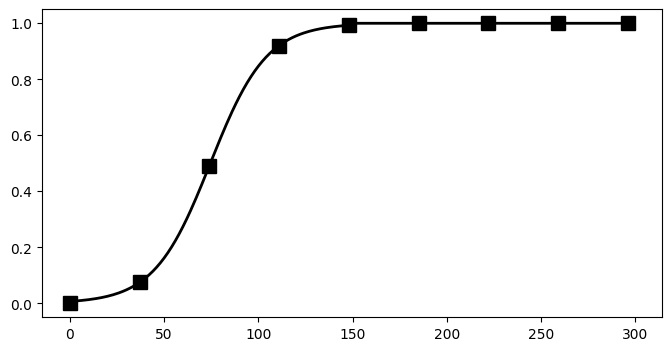

In [2]:



def generate_beta_curve(n_epochs, period_epochs, rise_ratio, start_first_rise_at_epoch=0):
    
    def f(x, K):
    if x == 0:
        return 0
    elif x == K:
        return 1
    else:
        return 1 / (1 + np.exp(-10 * (x-K/2)/K))


    def generate_rising_curve(K):
        curve = []
        for i in range(K):
            curve.append(f(i, K-1))
        return np.array(curve)

    def generate_single_beta_cycle(period, rise_ratio):
        cycle = np.ones(period)

        curve_steps_in_epochs = int(period * rise_ratio)

        rising_curve = generate_rising_curve(curve_steps_in_epochs)

        cycle[:rising_curve.shape[0]] = rising_curve[:cycle.shape[0]]

        return cycle

    beta_curve = np.zeros((start_first_rise_at_epoch))
    effective_epochs = n_epochs - start_first_rise_at_epoch
    n_cycles = np.ceil(effective_epochs/period_epochs)
    
    single_cycle = generate_single_beta_cycle(period_epochs, rise_ratio)
    
    for c in np.arange(n_cycles):
        beta_curve = np.append(beta_curve, single_cycle)
        
    return beta_curve[:n_epochs]
        
        
    


#beta_np_cyc = frange_cycle_sigmoid(start=0.0, stop=1, n_epoch=200, n_cycle=1, ratio=0.25)
n_epochs = 300
beta_np_cyc = generate_beta_curve(n_epochs=n_epochs, period_epochs=300, rise_ratio=0.5, start_first_rise_at_epoch=0)
fig=plt.figure(figsize=(8,4.0))
stride = max( int(n_epochs / 8), 1)

plt.plot(range(n_epochs), beta_np_cyc, '-', label='Cyclical', marker= 's', color='k', markevery=stride,lw=2,  mec='k', mew=1 , markersize=10)
plt.show()

In [3]:
np.zeros((0))

array([], dtype=float64)